In [1]:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [34]:
DATA_SET = os.path.join(os.getcwd(), 'data-set')

In [3]:
train = pd.read_json(os.path.join(DATA_SET, 'train.json'))
test = pd.read_json(os.path.join(DATA_SET, 'test.json'))

## Data Exploration

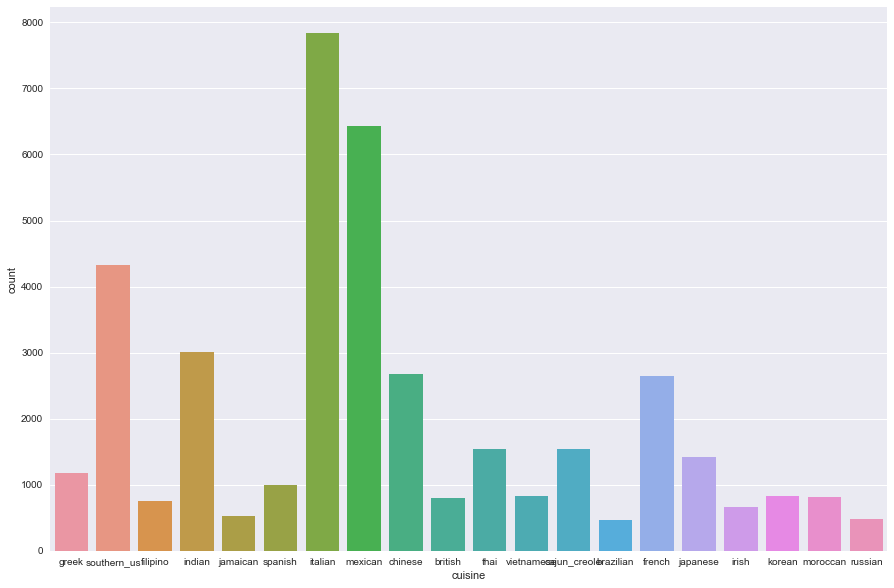

In [4]:
sns.set(rc={'figure.figsize':(15, 10)})
ax = sns.countplot(x='cuisine', data=train)

In [5]:
train['cuisine'].value_counts()

italian         7838
mexican         6438
southern_us     4320
indian          3003
chinese         2673
french          2646
cajun_creole    1546
thai            1539
japanese        1423
greek           1175
spanish          989
korean           830
vietnamese       825
moroccan         821
british          804
filipino         755
irish            667
jamaican         526
russian          489
brazilian        467
Name: cuisine, dtype: int64

In [6]:
len(train['cuisine'].unique())

20

## Data Preprocessing

#### 1. Count up the frequency of ingredients

In [51]:
from collections import defaultdict

In [57]:
ingredients = defaultdict(int)

In [58]:
for row in train.itertuples():
    for ingredient in getattr(row, 'ingredients'):
        ingredients[ingredient] +=1

In [60]:
most_common_ingredients = sorted(ingredients, key=ingredients.get, reverse=True)

In [76]:
ingredient_count = pd.concat([pd.DataFrame(list(ingredients.keys()), columns=['ingredient']), 
                              pd.DataFrame(list(ingredients.values()), columns=['count'])], 
                             axis=1)

In [78]:
df = ingredient_count.sort_values(by=['count'], ascending=False)

In [79]:
df.iloc[:100]

,ingredient,count
11,salt,18049
54,olive oil,7972
35,onions,7972
29,water,7457
3,garlic,7380
47,sugar,6434
105,garlic cloves,6237
27,butter,4848
13,ground black pepper,4785
115,all-purpose flour,4632


#### 2. Create an empty DataFrame that has all the ingredients as columns

In [19]:
ingredients_df = pd.DataFrame(np.zeros((len(train), len(all_ingredients))), columns=all_ingredients)

#### 3. Populate ingredients DataFrame

In [20]:
train.head()

,cuisine,id,ingredients
0,greek,10259,"[romaine lettuce, black olives, grape tomatoes..."
1,southern_us,25693,"[plain flour, ground pepper, salt, tomatoes, g..."
2,filipino,20130,"[eggs, pepper, salt, mayonaise, cooking oil, g..."
3,indian,22213,"[water, vegetable oil, wheat, salt]"
4,indian,13162,"[black pepper, shallots, cornflour, cayenne pe..."


In [27]:
for row in train.itertuples():
    for ingredient in getattr(row, 'ingredients'):
        ingredients_df.at[row.Index, ingredient] = 1

#### 4. Combine DataFrames together